# Logistic Regression (Lojistik Regresyon)
- Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. Bağımsız değişken değerleri geldiğinde bu bağımsız değişken değerlerine karşılık oluşabilecek olan bağımlı değişkenin değerlerini tahmin etmeye çalışmaktır.
- Çoklu doğrusal regresyonun sınıflandırma problemlerine uyarlanmış ve ufak farklılıklara tabi tutulmuş bir versiyondur.
- Bağımlı değişken kategoriktir(yani sınıfsaldır).
- Doğrusal regresyonda aranan varsayımlar burda aranmadığı için daha esnek kullanılabilirği vardır.
- Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez.
- Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.


**Gerekli Kütüphaneler** 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

# Veri Seti Hikayesi ve Problemi: Şeker Hastalığı Tahmini

In [3]:
df = pd.read_csv("./diabetes.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Logistic Regression - Model ve Tahmin İşlemleri 

In [4]:
# değerlerin toplam sayılarını gösterdik.
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#Bağımlı değişkeni y atıyoruz.
y = df["Outcome"]

In [7]:
# Bağımlı değişkeni çıkarıp bağımsız değişkenleri X e atıyoruz.
X = df.drop(["Outcome"], axis=1)

In [8]:
# Bağımlı değişkenler
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
#  Bağımsız değişkenler
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Model

In [10]:
loj_model = LogisticRegression(solver="liblinear").fit(X,y)

In [11]:
#sabit katsayı
loj_model.intercept_

array([-5.89159518])

In [12]:
#bağımsız değişken değerlerinin katsayısı
loj_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [13]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [14]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [15]:
y_pred = loj_model.predict(X)

In [16]:
#karmaşılık matrisi
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [17]:
# accuracy_score(Doğruluk Oranı), Başarılı yapılan işlemler tüm durumlara bölüyoruz. (başarılı yapılan işlem / tüm durumlar)
accuracy_score(y,y_pred)

0.7747395833333334

In [18]:
# Sınıflandırma Raporu
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
# Olasılık değerlerinden tahmin yapılmak istenirse eğer predict_proba() fonk. kullanılır.
loj_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

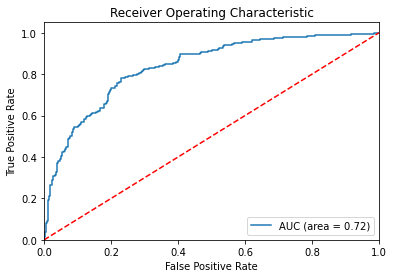

In [20]:
# Roc Eğrisi, model başarısını değerlendirmek üzerine false ve true positive rateler üzerinden oluşturulan bir grafik aracılığıyla bilgi sunulan bir değerdir.
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr,tpr,thresholds = roc_curve (y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.savefig("Log_ROC")
plt.show()

# Model Tuning (Model Doğrulama)
-  Modelin başarısını değerlendirmek için izlenecek yol Doğruluk oranına (accuracy_score) bakılarak yapılacak. 
- **accuracy_score**' u ne kadar büyük olursa sınıflandırma da o kadar başarılı olduğu anlamına gelir.
- Hiper parametrelerin optimum değerlerine ulaşmak içinde Cross-Validation yöntemini kullanmış olacağız.
- Yani modelleri Train Setiyle eğitirken Cross-Validation yönetemini kullanıp, dışarı bıraktığımız Test Setini ise performansımızı test etmek için kullanacaz.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)
                                                   

In [22]:
log_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [23]:
y_pred = log_model.predict(X_test)

In [24]:
# test seti hatası
accuracy_score(y_test,y_pred)

0.7532467532467533

In [26]:
loj_cv_model = cross_val_score(log_model,X_test,y_test, cv=10)
loj_cv_model

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.7826087 ])

In [28]:
# Test setine ilişkin daha doğru bir test hatasına eriştik.
loj_cv_model_mean = cross_val_score(log_model,X_test,y_test, cv=10).mean()
loj_cv_model_mean

0.7704710144927536